In [112]:
# Part A: Initial Data Exploration

# 1. Data Loading and Overview
# Load each CSV file from the dataset

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


# Load each dataset
# For Payment and Sales Analysis we load orders,payments
# For payment and sales insights, require only orders, order_items, and payments
customers = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_customers_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_orders_dataset.csv')
orders_payments = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_order_payments_dataset.csv')

# Product Analysis
# For product analysis, we need order_items, products, and category_translation.
products = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_products_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_order_items_dataset.csv')
product_category_name_translation = pd.read_csv('/content/drive/MyDrive/Project_Ramana/product_category_name_translation.csv')

# Customer Analysis
# For customer-centric analysis, we require customers, orders, and geolocation.
reviews = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_order_reviews_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_sellers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/Project_Ramana/olist_geolocation_dataset.csv')


print("Data Loaded Successfully")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data Loaded Successfully


In [113]:
# Examine the structure of each table
print("Customers Data:")
print(customers.head())
print("\nOrders Data:")
print(orders.head())
print("\nOrders Payments Data:")
print(orders_payments.head())
print("\nProducts Data:")
print(products.head())
print("\nOrder Items Data:")
print(order_items.head())
print("\nProduct Category Translation Data:")
print(product_category_name_translation.head())
print("\nReviews Data:")
print(reviews.head())
print("\nSellers Data:")
print(sellers.head())
print("\nGeolocation Data:")
print(geolocation.head())


Customers Data:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Orders Data:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb62512

In [114]:
# Examine the structure of each table
# print(customers.describe())
# print(orders.describe())
print(orders_payments.describe())
# print(products.describe())
print(order_items.describe())
# print(product_category_name_translation.describe())
# print(reviews.describe())
# print(sellers.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6

In [115]:
# Data Quality Assessment
# Identify missing values in each column
print("Missing Values:")
print("In customers Data\n",customers.isnull().sum())
print("In orders data\n",orders.isnull().sum())
print("In orders Payments data\n",orders_payments.isnull().sum())
print("In products data\n",products.isnull().sum())
print("In orders items data\n",order_items.isnull().sum())
print("IN product category name translation data\n",product_category_name_translation.isnull().sum())
print("In reviews data\n",reviews.isnull().sum())
print("In sellers data\n",sellers.isnull().sum())
print("In geolocation data\n",geolocation.isnull().sum())

Missing Values:
In customers Data
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
In orders data
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
In orders Payments data
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
In products data
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
d

In [116]:
# remove review title and comment
reviews=reviews.drop(['review_comment_title','review_comment_message'],axis=1)
print(reviews.head())


                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_creation_date review_answer_timestamp  
0             4     18-01-2018 00:00        18-01-2018 21:46  
1             5     10-03-2018 00:00        11-03-2018 03:05  
2             5     17-02-2018 00:00        18-02-2018 14:36  
3             5     21-04-2017 00:00        21-04-2017 22:02  
4             5     01-03-2018 00:00        02-03-2018 10:26  


In [153]:
# to checking for duplicates
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(orders_payments.duplicated().sum())
print(products.duplicated().sum())
print(order_items.duplicated().sum())
print(product_category_name_translation.duplicated().sum())
print(reviews.duplicated().sum())
print(sellers.duplicated().sum())




0
0
0
0
0
0
0
0


In [118]:
# to checking data types
print(customers.dtypes)
print(orders.dtypes)
print(orders_payments.dtypes)
print(products.dtypes)
print(order_items.dtypes)
print(product_category_name_translation.dtypes)
print(reviews.dtypes)
print(sellers.dtypes)
print(geolocation.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64

In [155]:
# In orders data set change data types for dates
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format='%d-%m-%Y %H:%M',errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'],format='%d-%m-%Y %H:%M', errors='coerce')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format='%d-%m-%Y %H:%M',errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'],format='%d-%m-%Y %H:%M', errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'],format='%d-%m-%Y %H:%M', errors='coerce')



# To check data types
print(customers.dtypes)
print(orders.dtypes)
print(orders_payments.dtypes)
print(products.dtypes)
print(order_items.dtypes)
print(product_category_name_translation.dtypes)
print(reviews.dtypes)
print(sellers.dtypes)
print(geolocation.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_len

In [120]:
# i want to see and remove outlier for each datasets

print(orders_payments.describe())
print(order_items.describe())

# removing outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = orders_payments['payment_value'].quantile(0.25)
Q3 = orders_payments['payment_value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_payments = orders_payments[(orders_payments['payment_value'] >= lower_bound) & (orders_payments['payment_value'] <= upper_bound)]

print(filtered_payments)


       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6

In [156]:
# merging with orders and order_items
orders_orderitems=pd.merge(order_items,orders,on='order_id',how='left')

# merge with orders_order_items with customers
cust_orders_orderitems=pd.merge(customers,orders_orderitems,on='customer_id',how='left')

# merge product with cust_orders_orderitems
product_data=pd.merge(cust_orders_orderitems,products,on='product_id',how='left')

# merge with cust_orders_orderitems with filtered payments
payments_data=pd.merge(product_data,filtered_payments,on='order_id',how='left')

# merge review with payments data
reviews_data=pd.merge(payments_data,reviews,on='order_id',how='left')

# merge sellers with payments data
sales_data=pd.merge(reviews_data,sellers,on='seller_id',how='left')

print(sales_data.head())




                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id  order_item_id  \
0  00e7ee1b050b8499577073aeb2a297a1            1.0   
1  29150127e6685892b6eab3eec79f59c7   

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract temporal features
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])
sales_data['order_date'] = sales_data['order_purchase_timestamp'].dt.day
sales_data['order_week'] = sales_data['order_purchase_timestamp'].dt.isocalendar().week
sales_data['order_month'] = sales_data['order_purchase_timestamp'].dt.month

print(sales_data.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id  order_item_id  \
0  00e7ee1b050b8499577073aeb2a297a1            1.0   
1  29150127e6685892b6eab3eec79f59c7   

order_date
1.0     377332.34
2.0     412319.03
3.0     403880.50
4.0     435425.81
5.0     425763.76
6.0     433297.79
7.0     405114.00
8.0     411794.19
9.0     390277.83
10.0    397357.14
11.0    408379.76
12.0    398317.15
13.0    429986.25
14.0    423628.80
15.0    429403.27
16.0    451682.45
17.0    386976.16
18.0    425237.71
19.0    430299.90
20.0    409424.63
21.0    379699.48
22.0    391123.39
23.0    387741.81
24.0    484537.71
25.0    401785.47
26.0    425819.96
27.0    399891.60
28.0    357785.92
29.0    321352.32
30.0    302498.31
31.0    201558.26
Name: payment_value, dtype: float64


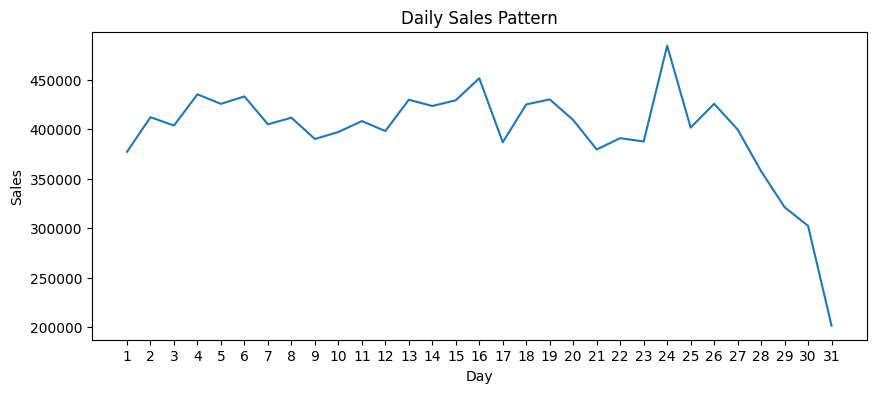

In [123]:
daily_sales=sales_data.groupby('order_date')['payment_value'].sum()


print(daily_sales)

plt.figure(figsize=(10, 4))
plt.plot(daily_sales.index,daily_sales.values)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Daily Sales Pattern')
plt.xticks(daily_sales.index)
plt.show()

order_week
1     186138.32
2     222298.59
3     240212.11
4     251404.17
5     253962.01
6     263178.31
7     254900.16
8     260883.09
9     302905.55
10    271799.76
11    284046.16
12    296570.55
13    250603.18
14    264807.53
15    252094.00
16    289172.07
17    304193.73
18    331699.85
19    357418.96
20    343351.35
21    211254.09
22    225349.15
23    286501.52
24    287847.51
25    258892.66
26    261951.15
27    240678.77
28    245480.24
29    329880.16
30    317821.76
31    368767.01
32    360845.32
33    340787.12
34    241027.82
35    133930.62
36    107942.29
37    143225.56
38    126260.74
39    114572.46
40    157567.83
41    132123.81
42    153002.04
43    120435.58
44    120554.44
45    144895.16
46    172785.99
47    373933.43
48    269362.20
49    210773.66
50    176528.57
51    118957.53
52    104117.06
Name: payment_value, dtype: float64


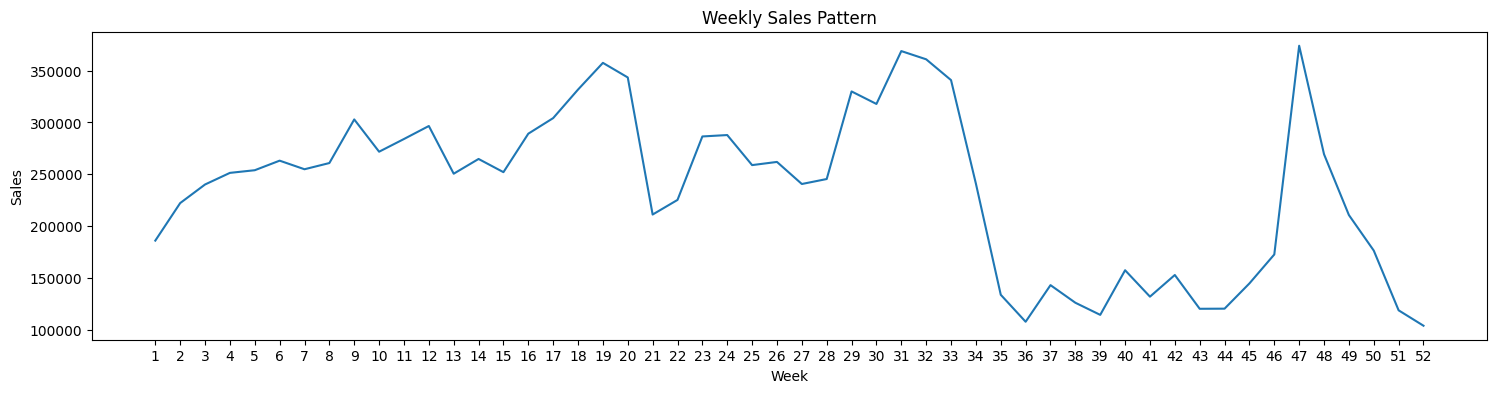

In [124]:
weekly_sales=sales_data.groupby('order_week')['payment_value'].sum()
print(weekly_sales)

plt.figure(figsize=(18, 4))
plt.plot(weekly_sales.index,weekly_sales.values)
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(weekly_sales.index)
plt.title('Weekly Sales Pattern')
plt.show()

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
order_month
1.0     1008688.25
2.0     1054291.25
3.0     1237182.43
4.0     1180172.65
5.0     1325676.67
6.0     1164443.94
7.0     1266473.19
8.0     1307064.04
9.0      524494.50
10.0     618909.47
11.0     948622.36
12.0     703673.95
Name: payment_value, dtype: float64


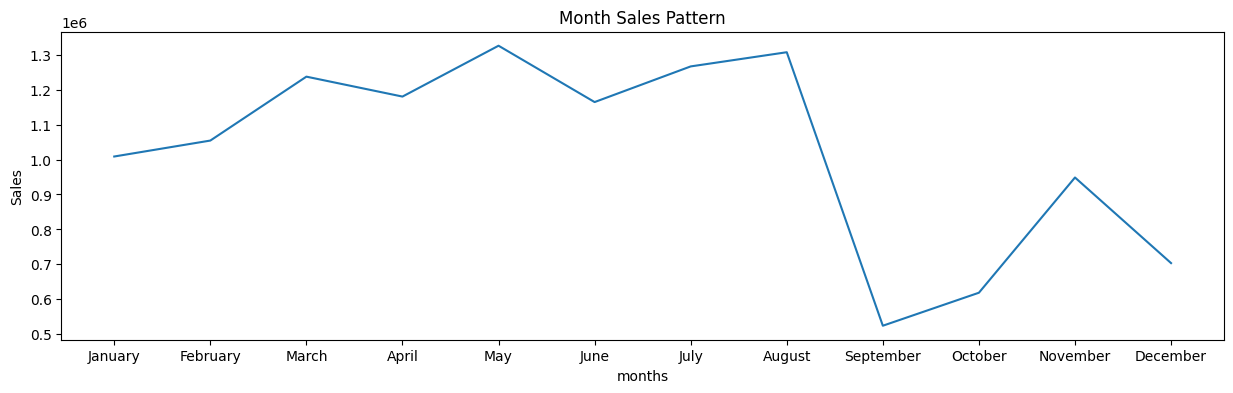

In [125]:
import calendar
month=list(calendar.month_name)[1:]
print(month)
monthly_sales=sales_data.groupby('order_month')['payment_value'].sum()

print(monthly_sales)

plt.figure(figsize=(15, 4))

plt.plot(month,monthly_sales.values)
plt.xlabel('months')
plt.ylabel('Sales')
plt.title('Month Sales Pattern')

plt.show()

order_quarter
1.0    3300161.93
2.0    3670293.26
3.0    3098031.73
4.0    2271205.78
Name: payment_value, dtype: float64


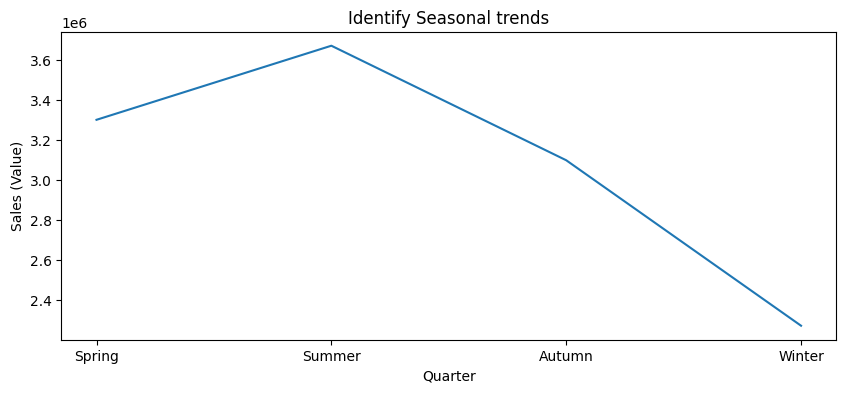

In [126]:
# Identify seasonal trends

sales_data['order_quarter'] = sales_data['order_purchase_timestamp'].dt.quarter
# Aggregate sales by quater
quaterly_sales = sales_data.groupby('order_quarter')['payment_value'].sum()
print(quaterly_sales)

# Plot Identify Seasonal trends pattern
plt.figure(figsize=(10, 4))
quarters=[1,2,3,4]
plt.plot(quaterly_sales.index,quaterly_sales.values)
plt.title("Identify Seasonal trends")
plt.xlabel("Quarter")
plt.ylabel("Sales (Value)")
plt.xticks(quarters,["Spring","Summer","Autumn","Winter"])
plt.show()

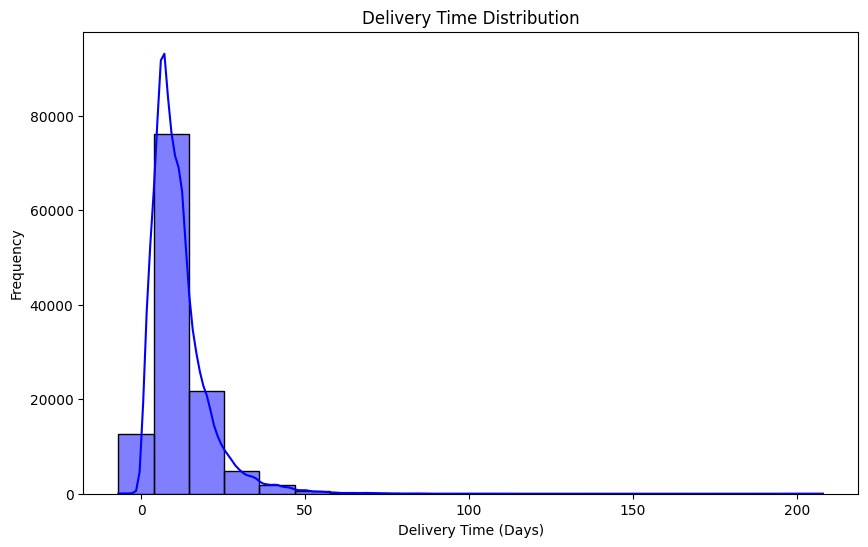

<ipython-input-127-32038a68b9bc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data['delivery_time'], orient='v', palette='Set2')


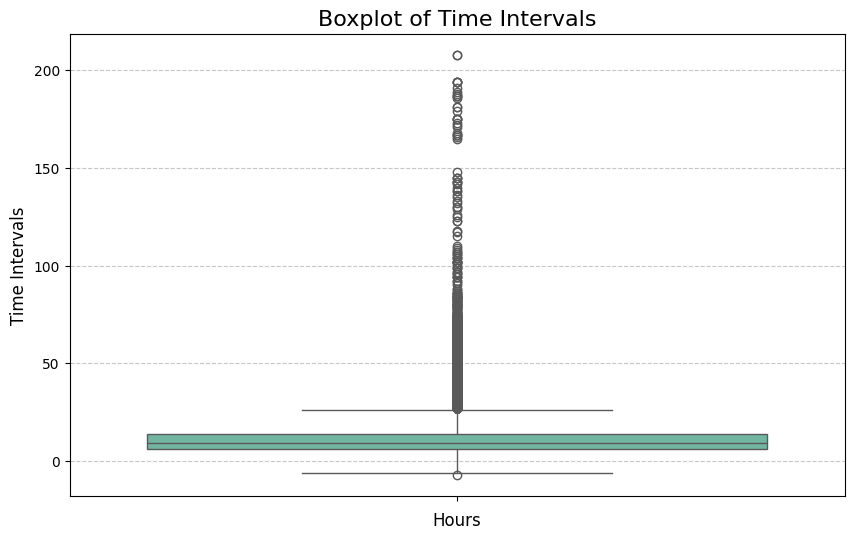

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id  order_item_id  \
0  00e7ee1b050b8499577073aeb2a297a1            1.0   
1  29150127e6685892b6eab3eec79f59c7   

In [127]:
# Study delivery time patterns
# Calculate delivery time
# sales_data['order_delivered_customer_date'] = pd.to_datetime(sales_data['order_delivered_customer_date'])
# sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])


# Calculate delivery time
sales_data['delivery_time'] = (sales_data['order_delivered_customer_date'] - sales_data['order_approved_at']).dt.days


# Delivery time distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['delivery_time'].dropna(), bins=20, kde=True, color='blue')
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()


# print(sales_data.head())

# Boxplots for comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data['delivery_time'], orient='v', palette='Set2')
plt.title('Boxplot of Time Intervals', fontsize=16)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Time Intervals', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print(sales_data.head())


In [128]:
# merge with customers and geolocation data

geolocation=geolocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
customer_analysis=pd.merge(customers,geolocation,on='customer_zip_code_prefix',how='left')

print(customer_analysis.head())

print(customer_analysis.isnull().sum())

# null values drop
customer_analysis=customer_analysis.dropna()
print(customer_analysis.isnull().sum())



                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  geolocation_lat  \
0                     14409        franca             SP       -20.509897   
1                     14409        franca             SP       -20.497396   
2                     14409        franca             SP       -20.510459   
3                     14409        franca             SP       -20.480940   
4                     14409        franca             SP       -20.515413   

   geolocation_lng geolocation_city geolocation_state  
0       -47.397866           franca       

customer_city
rio de janeiro    1913966
sao paulo         1372374
belo horizonte     737548
niteroi            452857
curitiba           255744
santos             238952
porto alegre       228824
uberlandia         191192
campinas           170318
santo andre        167082
Name: count, dtype: int64


<ipython-input-157-565214963156>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')


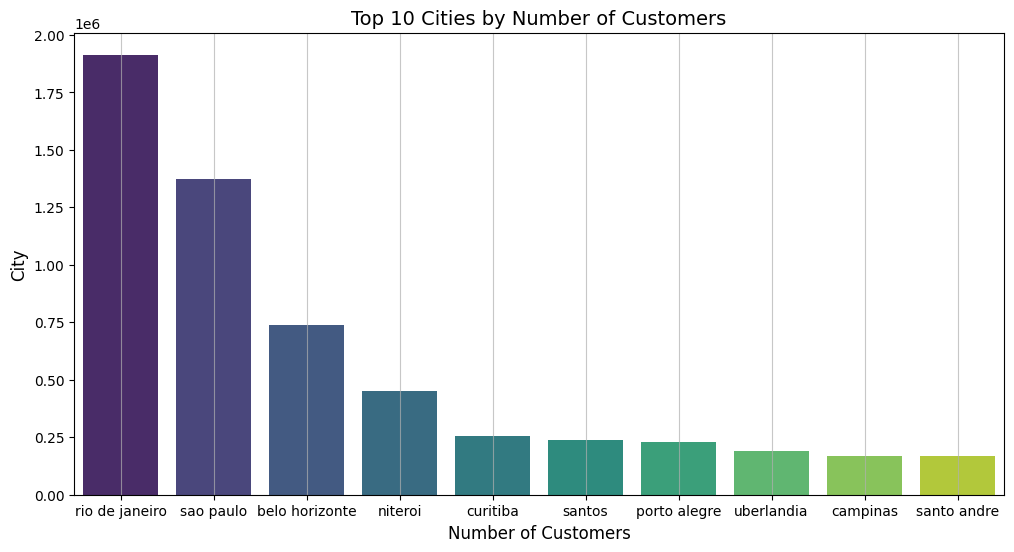

In [157]:
city_counts = customer_analysis['customer_city'].value_counts().head(10)
print(city_counts)
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 10 Cities by Number of Customers', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.grid(axis='x', alpha=0.7)
plt.show()


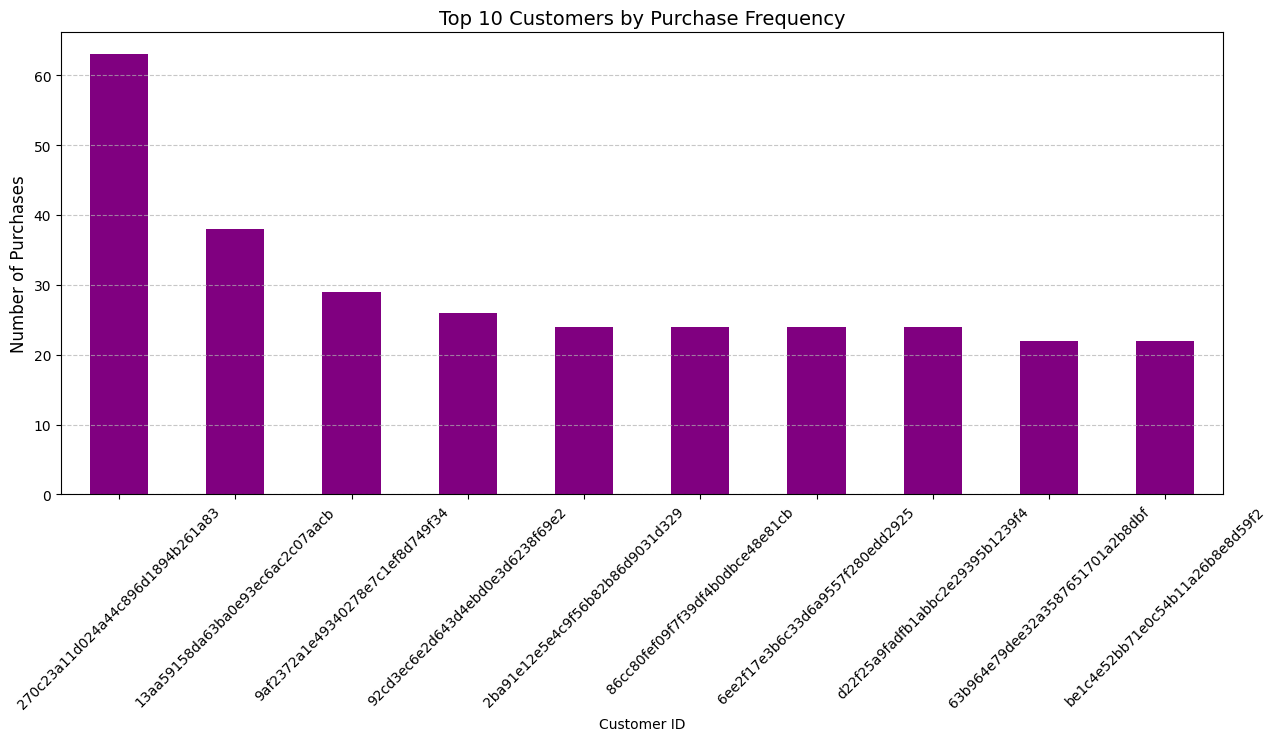

In [130]:
# Count purchases per customer
customer_frequency = sales_data['customer_id'].value_counts()

# Plot top 10 customers by purchase frequency
plt.figure(figsize=(15, 6))
customer_frequency.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Purchase Frequency', fontsize=14)
plt.xlabel('Customer ID', fontsize=10)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118898 non-null  object        
 1   customer_unique_id             118898 non-null  object        
 2   customer_zip_code_prefix       118898 non-null  int64         
 3   customer_city                  118898 non-null  object        
 4   customer_state                 118898 non-null  object        
 5   order_id                       118109 non-null  object        
 6   order_item_id                  118109 non-null  float64       
 7   product_id                     118109 non-null  object        
 8   seller_id                      118109 non-null  object        
 9   shipping_limit_date            118109 non-null  object        
 10  price                          118109 non-null  float64       
 11  

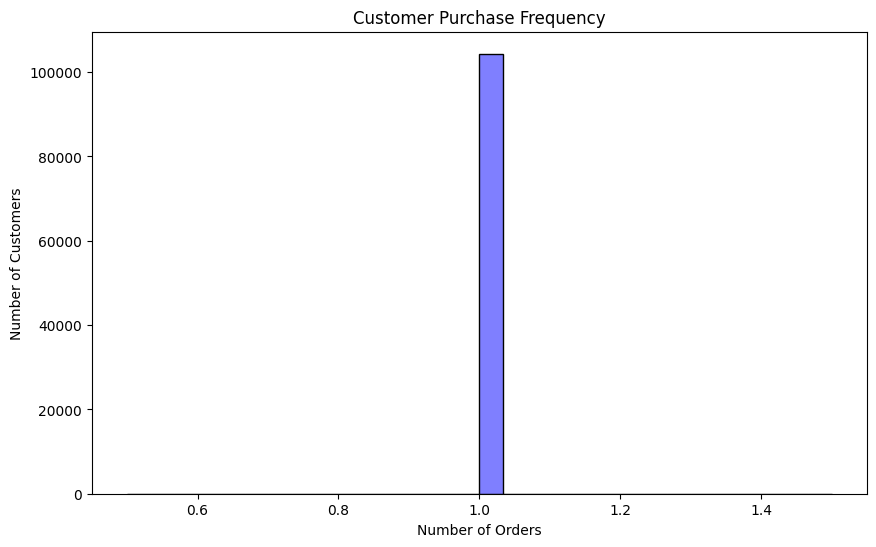

In [131]:
# Calculate the number of orders per customer

print(sales_data.info())

# Calculate the number of orders per customer
customer_purchase_frequency = sales_data.value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_frequency, bins=30, kde=True, color='blue')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

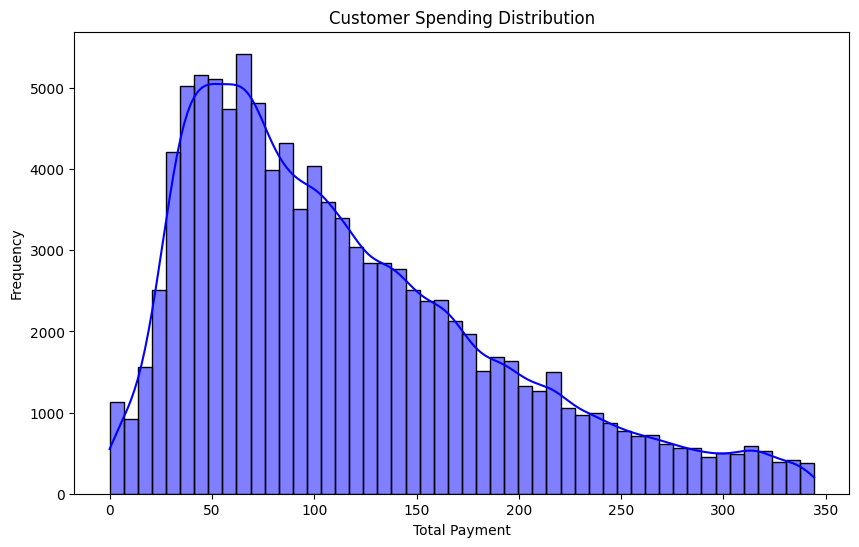

In [132]:
# Plot distribution of spending

plt.figure(figsize=(10, 6))
sns.histplot(sales_data['payment_value'], bins=50, kde=True, color='blue')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Payment')
plt.ylabel('Frequency')
plt.show()




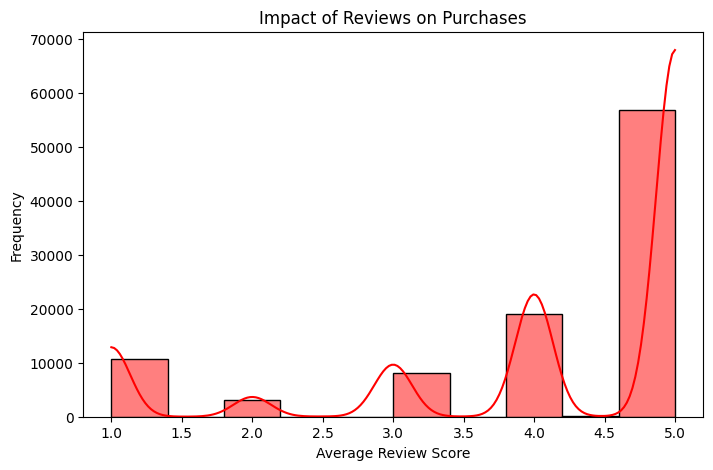

In [133]:
# Average review score by customer
avg_review_score = sales_data.groupby('order_id')['review_score'].mean()
plt.figure(figsize=(8, 5))
sns.histplot(avg_review_score, bins=10, kde=True, color='red')
plt.title('Impact of Reviews on Purchases')
plt.xlabel('Average Review Score')
plt.ylabel('Frequency')
plt.show()

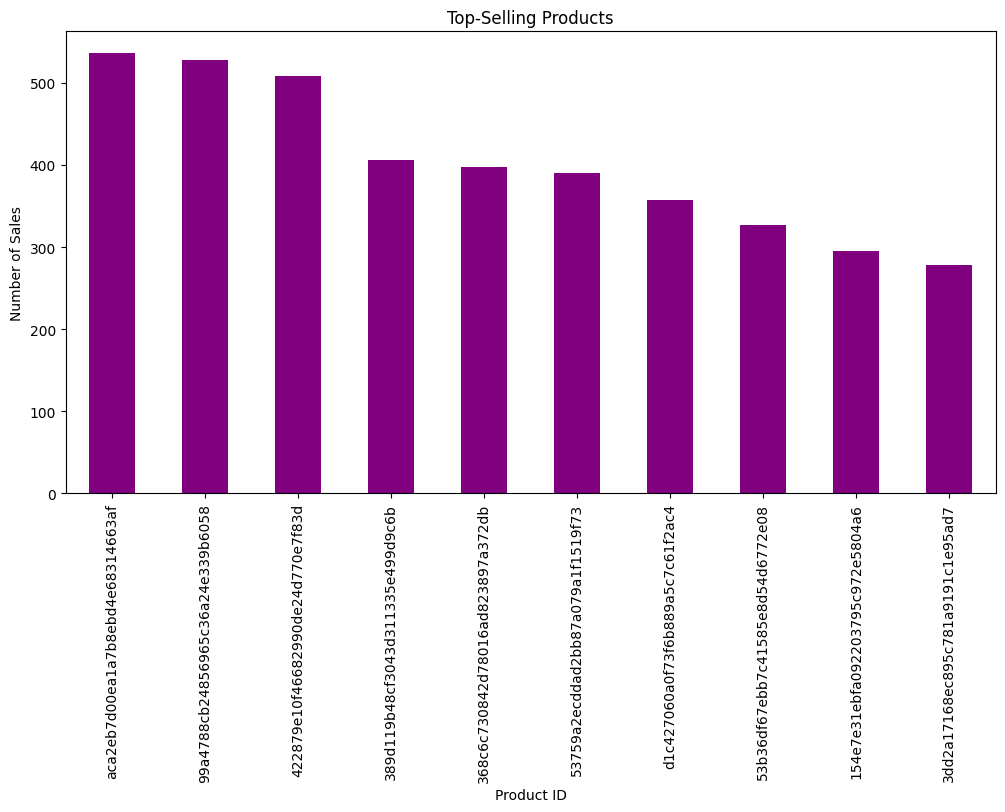

In [134]:
# Top-selling products
top_products = sales_data['product_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Sales')
plt.show()

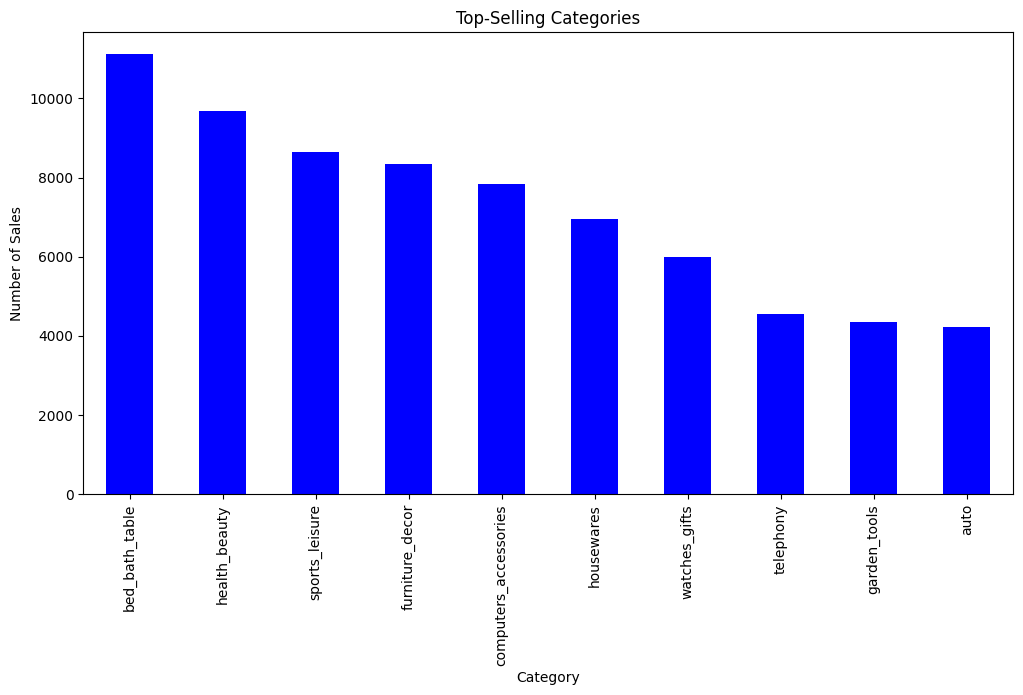

In [136]:
# Top categories


#instead, the order_items dataframe has a product_id that maps to product_category_name in the products dataframe
order_products_categories =pd.merge(order_items,products[['product_id','product_category_name']], on='product_id', how='left')

#merge with product_category_name_translation
order_products_categories = pd.merge(order_products_categories,product_category_name_translation,on='product_category_name',how='left')
#print(order_products_categories.head())
top_categories = order_products_categories['product_category_name_english'].value_counts().head(10)

order_products_categories['product_category_name_english']=order_products_categories['product_category_name_english'].str.lower()
top_categories =order_products_categories['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='blue')
plt.title('Top-Selling Categories')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()



Text(0, 0.5, 'Frequency')

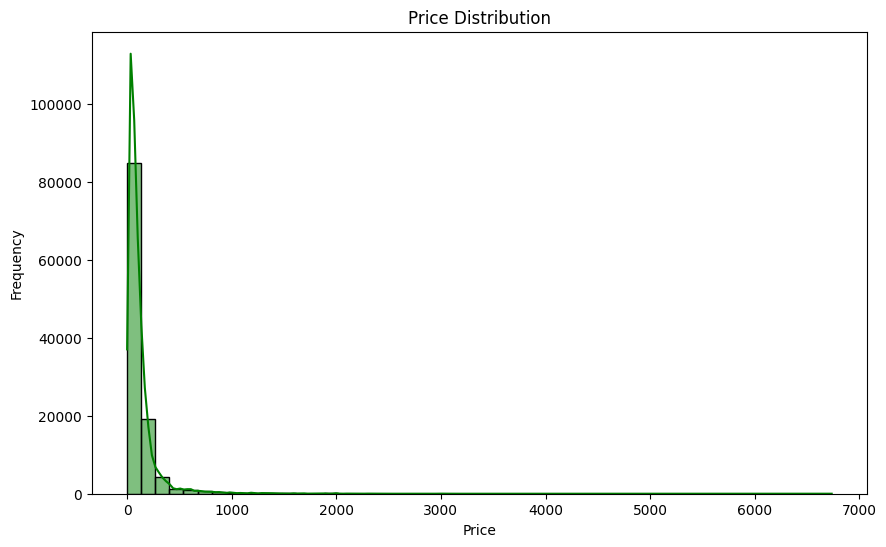

In [137]:
# Analyze price distributions
plt.figure(figsize=(10, 6))
sns.histplot(order_products_categories['price'], bins=50, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Logistics and Delivery Analysis:
       product_category_name  avg_delivery_time  max_delivery_time  \
0  agro_industria_e_comercio          11.506024               52.0   
1                  alimentos           9.184411              138.0   
2          alimentos_bebidas          10.518900               55.0   
3                      artes          10.863014               42.0   
4         artes_e_artesanato           5.291667               21.0   

   min_delivery_time  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0  


<ipython-input-138-4fc6768d96da>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_delivery_time', y='product_category_name', data=logistics_analysis.sort_values(by='avg_delivery_time').head(10), palette='mako')


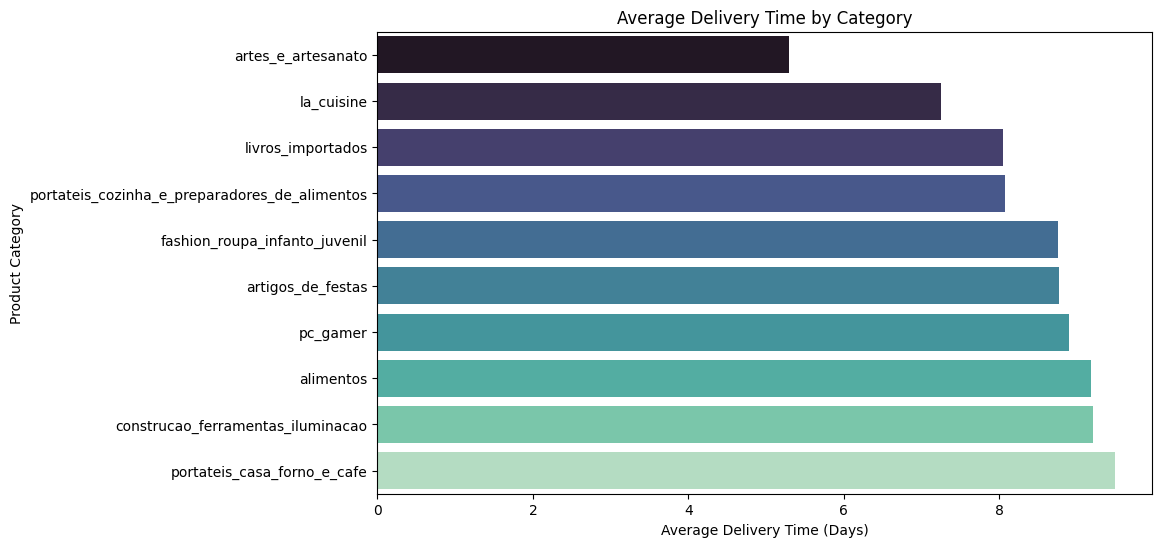

In [138]:
# Study product category relationships
#  Logistics and Delivery Analysis
logistics_analysis = df.groupby('product_category_name').agg(
    avg_delivery_time=('delivery_time', 'mean'),
    max_delivery_time=('delivery_time', 'max'),
    min_delivery_time=('delivery_time', 'min')
).reset_index()

print("Logistics and Delivery Analysis:")
print(logistics_analysis.head())


# Delivery Time by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_delivery_time', y='product_category_name', data=logistics_analysis.sort_values(by='avg_delivery_time').head(10), palette='mako')
plt.title('Average Delivery Time by Category')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Product Category')
plt.show()


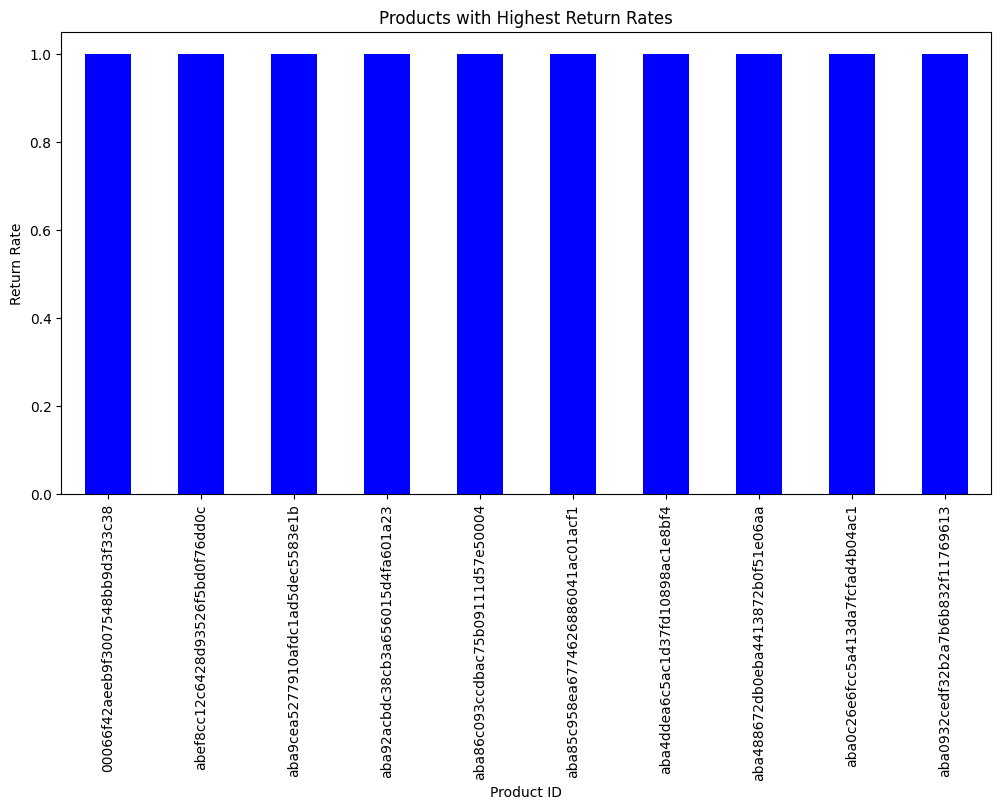

In [139]:
# Calculate product return rates
sales_data['is_returned'] = sales_data['order_item_id'].duplicated(keep=False)
return_rates = sales_data.groupby('product_id')['is_returned'].mean()

# Top products with highest return rates
top_returned_products = return_rates.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_returned_products.plot(kind='bar', color='blue')
plt.title('Products with Highest Return Rates')
plt.xlabel('Product ID')
plt.ylabel('Return Rate')
plt.show()


In [145]:
import pandas as pd

print(sales_data.info())

# copy the sales data to df
df = sales_data.copy()

# Assuming df is your dataset
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Create the target variable
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118898 non-null  object        
 1   customer_unique_id             118898 non-null  object        
 2   customer_zip_code_prefix       118898 non-null  int64         
 3   customer_city                  118898 non-null  object        
 4   customer_state                 118898 non-null  object        
 5   order_id                       118109 non-null  object        
 6   order_item_id                  118109 non-null  float64       
 7   product_id                     118109 non-null  object        
 8   seller_id                      118109 non-null  object        
 9   shipping_limit_date            118109 non-null  object        
 10  price                          118109 non-null  float64       
 11  

In [147]:
# Select features
features = ['freight_value', 'product_weight_g', 'product_height_cm', 'product_width_cm', 'product_length_cm', 'price']

# Drop rows with missing target variable or features
df = df.dropna(subset=['delivery_time'] + features)
print(df)


                             customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
118893  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
118894  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
118895  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
118896  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
118897  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

        customer_zip_code_prefix          customer_city custome

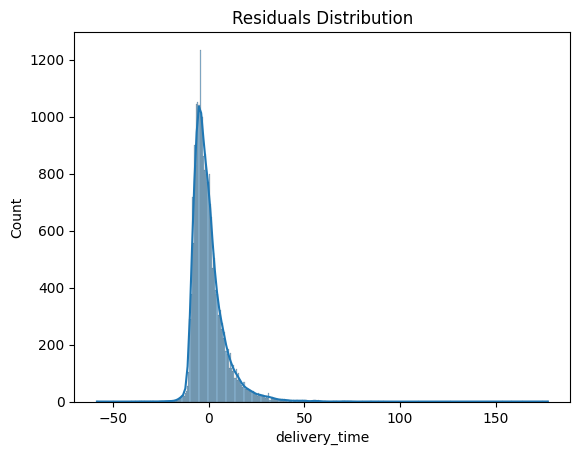

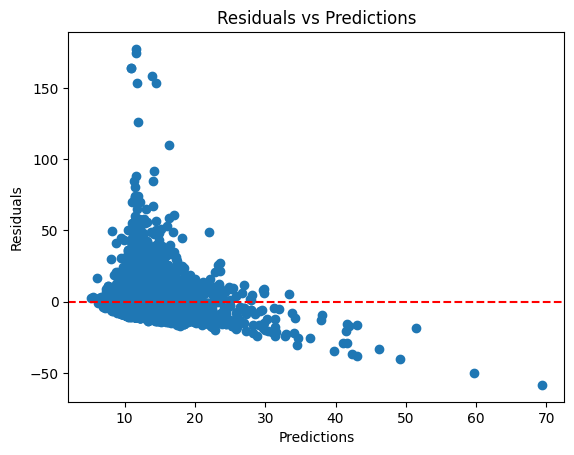

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[features]
y = df['delivery_time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


# Residuals
residuals = y_test - y_pred_test

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predictions
plt.scatter(y_pred_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()


In [152]:
import numpy as np

# Metrics
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


# Validate on test set
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Test Set R²: {r2_test}")


R²: 0.04559608924691583
RMSE: 9.118531936273415
MAE: 6.052918990896109
             Feature  Coefficient
0      freight_value     0.154584
4  product_length_cm     0.021900
2  product_height_cm     0.010657
1   product_weight_g    -0.000193
5              price    -0.001065
3   product_width_cm    -0.021144
Test Set R²: 0.04559608924691583
